#                                AI IMAGE CLASSIFIER

##### This project involved building a machine learning model that can effectively classify real images and those generated by AI. The first step was to create a dataset comprising AI-generated and real images. To accomplish this, pygoogle_image is used , with which images from Google are downloaded. Apart from Google Images, two more datasets are used. Then, a Convulutional Nueral Network based Classifier model was constructed and trained on the dataset containing around 1,00,000 images.

#### First, let's import all the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import random
import PIL
import pickle 

### Web Scraping and Generating a Dataset

##### Here, we used pygoogle_image library to download google images 

Since, the data collected from google images is not enought for training a model, we have used two more datasets

1. CIFAKE: Real and AI-Generated Synthetic Images
2. Ai Generated Images | Images Created using Ai from Kaggle

#### Now, we will be pre-processing the data

In [2]:
data = "/Users/shivanjanivuppula/Desktop/nikhilsai/train"
categories = ['AIGenerated','Real']

In [3]:
img_size = 48

In [4]:
img_size = 48
training_data = []
categories = ["AIGenerated", "Real"]  # Replace with your actual category names

for category in categories:
    path = os.path.join(data, category)
    classes = categories.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        if not os.path.isfile(img_path):
            print(f"Skipping invalid file: {img_path}")
            continue
        if not img.lower().endswith(('.jpg', '.jpeg', '.png')):
            print(f"Skipping non-image file: {img}")
            continue
        try:
            img_array = cv.imread(img_path)
            if img_array is None:
                print(f"Skipping unreadable file: {img}")
                continue
            new_array = cv.resize(img_array, (img_size, img_size))
            new_array = new_array / 255.0
            training_data.append([new_array, classes])
        except Exception as e:
            print(f"Error processing {img}: {e}")


Skipping non-image file: lake-with-mountains-digital-download-ai-art-landscape-627.webp
Skipping non-image file: scenery-art-landscape-ai-987.webp
Skipping non-image file: psychedelic-revelation-ai-artwork-718_300x2x.webp
Skipping non-image file: dalle2 generated images_58.gif
Skipping non-image file: 1707541234037


libpng warning: iCCP: profile 'ICC Profile': 'CMYK': invalid ICC profile color space
libpng warning: iCCP: profile 'ICC Profile': 'CMYK': invalid ICC profile color space


Skipping non-image file: black-american-portraits-130.gif


In [5]:
len(training_data), training_data[0][0].shape

(3553, (48, 48, 3))

In [6]:
random.shuffle(training_data)

In [7]:
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

In [8]:
X_train.shape

(3553, 48, 48, 3)

In [9]:
y_train.shape

(3553,)

In [10]:
X_train[0].shape

(48, 48, 3)

#### Storing X_train and y_train

In [11]:
pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out, protocol=4)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out, protocol=4)
pickle_out.close()

In [12]:
pickle_in = open("X_train.pickle", "rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle", "rb")
y_train = pickle.load(pickle_in)

In [13]:
X_train.shape

(3553, 48, 48, 3)

In [14]:
y_train.shape

(3553,)

## Creating the Model

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential

In [16]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (48,48,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,089 (1.56 MB)

 Trainable params: 409,089 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

## Model Plot

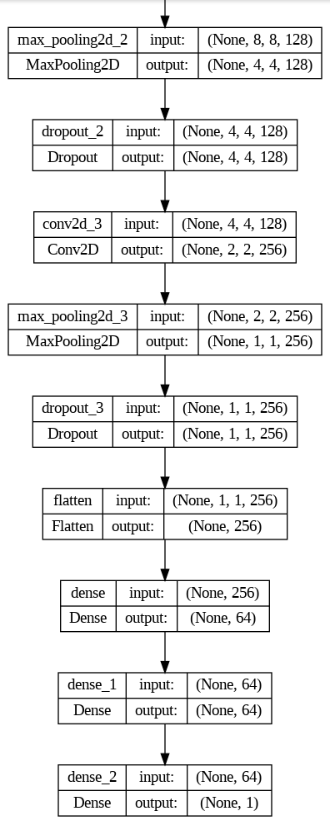

## Training the Model

In [18]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6017 - loss: 0.6688
Epoch 2/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5938 - loss: 0.6485
Epoch 3/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6546 - loss: 0.6260
Epoch 4/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6833 - loss: 0.5938
Epoch 5/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7116 - loss: 0.5611
Epoch 6/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7055 - loss: 0.5697
Epoch 7/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7402 - loss: 0.5245
Epoch 8/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7451 - loss: 0.5208
Epoch 9/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7682 - loss: 0.4794
Epoch 10/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7735 - loss: 0.4627
Epoch 11/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8202 - loss: 0.4179
Epoch 12/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 

### Storing the Model

In [19]:
model.save("AIGeneratedModel.keras")

In [20]:
model_new = keras.models.load_model("AIGeneratedModel.keras")

In [21]:
import os
import cv2 as cv
import numpy as np
import random

data = "/Users/shivanjanivuppula/Desktop/nikhilsai/testing"
categories = ['AIGenerated','Real']
img_size = 48
testing_data = []

for category in categories:
    path = os.path.join(data, category)
    classes = categories.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        
        # Check if file exists and is an image
        if not os.path.isfile(img_path):
            print(f"Skipping invalid file: {img_path}")
            continue
        if not img.lower().endswith(('.jpg', '.jpeg', '.png')):
            print(f"Skipping non-image file: {img}")
            continue
        
        try:
            img_array = cv.imread(img_path)
            if img_array is None:
                print(f"Skipping unreadable file: {img_path}")
                continue
            new_array = cv.resize(img_array, (img_size, img_size))
            new_array = new_array / 255.0
            testing_data.append([new_array, classes])
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue

# Shuffle the data
random.shuffle(testing_data)

# Prepare X_test and y_test
X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)


Skipping non-image file: lake-with-mountains-digital-download-ai-art-landscape-627.webp
Skipping non-image file: scenery-art-landscape-ai-987.webp
Skipping non-image file: psychedelic-revelation-ai-artwork-718_300x2x.webp
Skipping non-image file: dalle2 generated images_58.gif
Skipping non-image file: 1707541234037


libpng warning: iCCP: profile 'ICC Profile': 'CMYK': invalid ICC profile color space
libpng warning: iCCP: profile 'ICC Profile': 'CMYK': invalid ICC profile color space


Skipping non-image file: black-american-portraits-130.gif


#### On evaluating, the model gave an accuracy of 93.90%

In [22]:
model_new.evaluate(X_test, y_test)

112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9233 - loss: 0.2380


[0.2391168624162674, 0.9240078926086426]

In [23]:
y_pred = model_new.predict(X_test)

112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [24]:
X_test.shape

(3553, 48, 48, 3)

In [25]:
y_test.shape

(3553,)

In [26]:
y_pred.shape

(3553, 1)

In [27]:
y_predicted = []

for arr in y_pred:
    if arr[0] <= 0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

y_predicted = np.array(y_predicted)

In [28]:
y_predicted.shape

(3553,)

### Printing the Classification Report

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1447
           1       0.93      0.94      0.94      2106

    accuracy                           0.92      3553
   macro avg       0.92      0.92      0.92      3553
weighted avg       0.92      0.92      0.92      3553



## Testing 

In [30]:
def find_out(path_img):
    img_arr = cv.imread(path_img)
    plt.imshow(img_arr)
    new_arr = cv.resize(img_arr, (48,48))
    new_arr = new_arr/255
    test = []
    test.append(new_arr)
    test = np.array(test).reshape(-1, img_size, img_size, 3)
    y = model_new.predict(test)
    if y[0] >= 0.5:
        print("The given image is Real.")
    else:
        print("The given image is AI Generated.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
The given image is Real.


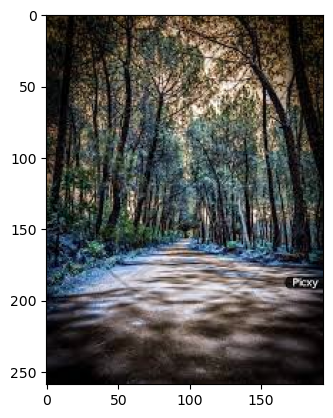

In [33]:
path_img = '/Users/shivanjanivuppula/Desktop/check/images-4.jpg'
find_out(path_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
The given image is Real.


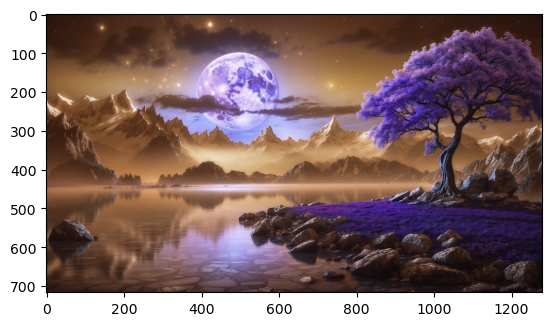

In [45]:
path_img = '/Users/shivanjanivuppula/Desktop/check/ai-generated-8612487_1280.jpg'
find_out(path_img)